# 4 分布图

## 4.2 分类变量直方图

横坐标：汽车制造商manufacture<br>
纵坐标：频数<br>
图例：汽车种类class

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #用不到
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei'] #显示中文
plt.rcParams['axes.unicode_minus'] = False #显示负号

In [8]:
#导入数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [9]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


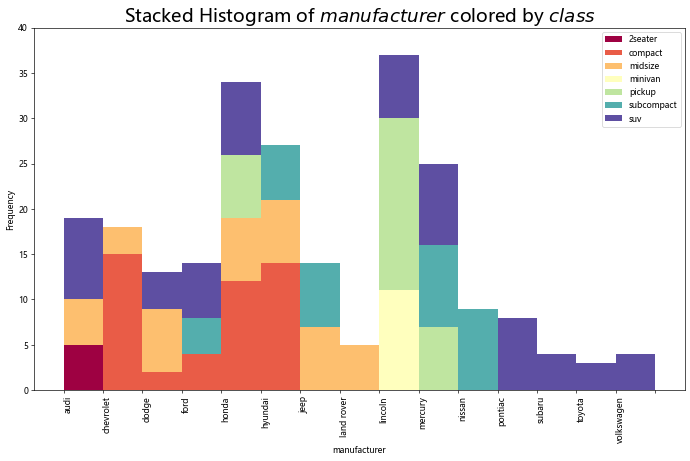

In [11]:
#准备数据
x_var = 'manufacturer' #x轴特征
groupby_var = 'class' #分类标签（颜色标签）
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var) #根据颜色标签将x轴特征分组
vals = [df[x_var].values.tolist() for i, df in df_agg] #提取出每组特征

#绘制图像
plt.figure(figsize = (14,8), dpi = 60) #创建画布
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))] #创建颜色列表
n, bins, patches = plt.hist(vals
                           ,df[x_var].unique().__len__() #生成15个bin
                           ,stacked = True #堆叠
                           ,density = False #频数（默认）
                           ,color = colors[:len(vals)] #颜色
                          ) #绘制堆叠直方图

#装饰图像
plt.legend({group:col for group
           ,col in zip(np.unique(df[groupby_var]).tolist(),colors[:len(vals)])
           }) #车型和对应颜色
#plt.legend(np.unique(df[groupby_var]), frameon = False, fontsize = 15)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22) #添加标题
plt.xlabel(x_var) #设定x轴标签
plt.ylabel("Frequency") #设定y轴标签
plt.ylim(0, 40) #设定y轴刻度范围
plt.xticks(ticks = bins
          ,labels = np.unique(df[x_var]).tolist()
          ,rotation = 90
          ,horizontalalignment = 'left' #文字的左边与刻度对齐
          ) #x轴刻度
plt.yticks(fontsize = 16) #y轴刻度字体大小
plt.show()

In [12]:
df[x_var].unique() #去重，与np.unique作用相同

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [13]:
np.unique(df[x_var])

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [14]:
df[x_var].unique().__len__() #返回对象长度，与len()作用相同

15

In [16]:
len(df[x_var].unique())

15

In [17]:
{group:col for group ,col in zip(np.unique(df[groupby_var]).tolist(),colors[:len(vals)])}

{'2seater': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'compact': (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 'midsize': (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 'minivan': (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 'pickup': (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 'subcompact': (0.3280276816608997,
  0.6805074971164936,
  0.6802768166089965,
  1.0),
 'suv': (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)}

图像解读：不同品牌的车生产的车型。